In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from scipy.stats import zscore
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
path = 'drive/MyDrive/Questions and Dataset'


**1. Import and warehouse data:**


*   Import all the given datasets and explore shape and size of each.
*   Merge all datasets onto one and explore final shape and size.




In [ ]:
Normaldf = pd.read_csv(path + '/Part1 - Normal.csv')

In [ ]:
Normaldf.head(15)

In [ ]:
Normaldf.shape

(100, 7)

In [ ]:
Normaldf.size

700

In [ ]:
Normaldf.Class.unique()

array(['Normal', 'Nrmal'], dtype=object)

In [ ]:
Normaldf.info()

In [ ]:
Normaldf.isna().sum()

In [ ]:
TypeHdf = pd.read_csv(path + '/Part1 - Type_H.csv')

In [ ]:
TypeHdf.head(15)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Type_H
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Type_H
7,45.366754,10.755611,29.038349,34.611142,117.270068,-10.675871,Type_H
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Type_H
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Type_H


In [ ]:
TypeHdf.shape

(60, 7)

In [ ]:
TypeHdf.size

420

In [ ]:
TypeHdf.isna().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [ ]:
TypeHdf.Class.unique()

array(['Type_H', 'type_h'], dtype=object)

In [ ]:
TypeHdf.info()

In [ ]:
TypeSdf = pd.read_csv(path +'/Part1 - Type_S.csv')

In [ ]:
TypeSdf.head(15)

In [ ]:
TypeSdf.shape

(150, 7)

In [ ]:
TypeSdf.size

1050

In [ ]:
TypeSdf.Class.unique()

array(['Type_S', 'tp_s'], dtype=object)

In [ ]:
TypeSdf.info()

In [ ]:
TypeSdf.isna().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

**Merging of all 3 DataFrames.**
*   Merge all datasets onto one and explore final shape and size.

In [ ]:
df = pd.concat([Normaldf,TypeHdf,TypeSdf])

**shape and size**

In [ ]:
df.shape

(310, 7)

In [ ]:
df.size

2170

**2. Data cleansing:**
*   Explore and if required correct the datatypes of each attribute
*   Explore for null values in the attributes and if required drop or impute values.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 19.4+ KB


In [ ]:
df.groupby(['Class']).count()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
Class,,,,,,
Normal,73,73,73,73,73,73
Nrmal,27,27,27,27,27,27
Type_H,37,37,37,37,37,37
Type_S,133,133,133,133,133,133
tp_s,17,17,17,17,17,17
type_h,23,23,23,23,23,23


Converting Nrmal to Normal, type_h to Type_H, tp_s to Type_S

In [ ]:
replace_Struct = { 'Class':{'Nrmal' : 'Normal', 'type_h':'Type_H', 'tp_s':'Type_S'}
                  }

In [ ]:
df = df.replace(replace_Struct)

In [ ]:
df.groupby(['Class']).count()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
Class,,,,,,
Normal,100,100,100,100,100,100
Type_H,60,60,60,60,60,60
Type_S,150,150,150,150,150,150


In [ ]:
df.Class = df.Class.astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   P_incidence  310 non-null    float64 
 1   P_tilt       310 non-null    float64 
 2   L_angle      310 non-null    float64 
 3   S_slope      310 non-null    float64 
 4   P_radius     310 non-null    float64 
 5   S_Degree     310 non-null    float64 
 6   Class        310 non-null    category
dtypes: category(1), float64(6)
memory usage: 17.4 KB


Explore for null values in the attributes and if required drop or impute values.

In [ ]:
df.isna().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

In [ ]:
df.shape

(310, 7)

dropping null values

In [ ]:
df = df.dropna()

checking whether any value dropped or not by checking the shape again

In [ ]:
df.shape

(310, 7)

shape of df is same. No null values present

**3. Data analysis & visualisation:**
* Perform detailed statistical analysis on the data.





In [ ]:
df.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


When the mean and the median are the same, the dataset is more or less evenly distributed from the lowest to highest values. When the mean and the median are different then it is likely the data is not symmetrical but is either skewed to the left or the right.

In [ ]:
df.mean()

P_incidence     60.496653
P_tilt          17.542822
L_angle         51.930930
S_slope         42.953831
P_radius       117.920655
S_Degree        26.296694
dtype: float64

In [ ]:
df.median()

P_incidence     58.691038
P_tilt          16.357689
L_angle         49.562398
S_slope         42.404912
P_radius       118.268178
S_Degree        11.767934
dtype: float64

In [ ]:
df.skew()

P_incidence    0.520440
P_tilt         0.676553
L_angle        0.599451
S_slope        0.792577
P_radius      -0.176835
S_Degree       4.317954
dtype: float64

The skewness values can be interpreted in the following manner:

*   Highly skewed distribution: If the skewness value is less than −1 or greater than +1.
*   Moderately skewed distribution: If the skewness value is between −1 and −½ or between +½ and +1.
*   Approximately symmetric distribution: If the skewness value is between −½ and +½.










*  Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each
analysis.

Univariate Analysis

Univariate Analysis : Distribution Plot

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated

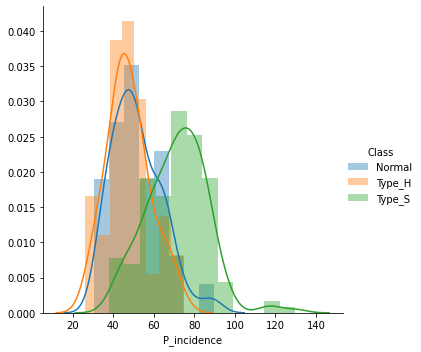

In [ ]:
sns.FacetGrid(df, hue = 'Class', size = 5).map(sns.distplot, 'P_incidence').add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated

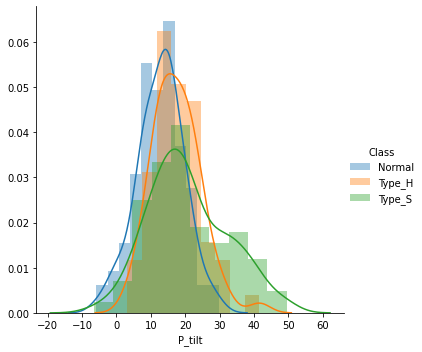

In [ ]:
sns.FacetGrid(df, hue = 'Class', size = 5).map(sns.distplot, 'P_tilt').add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated

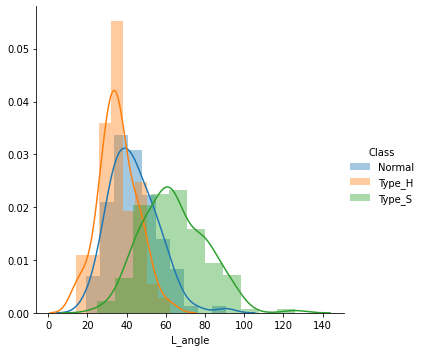

In [ ]:
sns.FacetGrid(df, hue = 'Class', size = 5).map(sns.distplot, 'L_angle').add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated

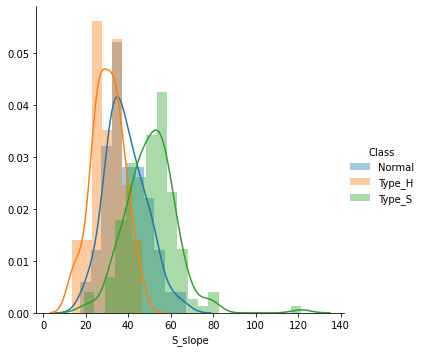

In [ ]:
sns.FacetGrid(df, hue = 'Class', size = 5).map(sns.distplot, 'S_slope').add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated

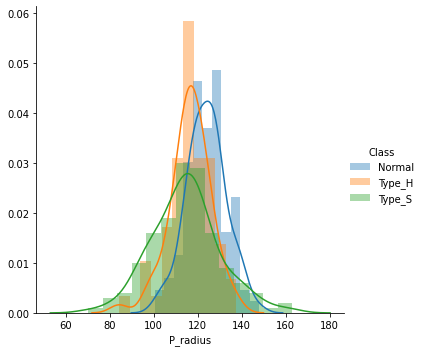

In [ ]:
sns.FacetGrid(df, hue = 'Class', size = 5).map(sns.distplot, 'P_radius').add_legend()

Most of the P_radius values lies between 110 to 130 for all three categories

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated

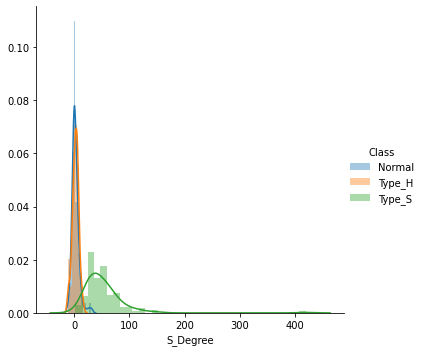

In [ ]:
sns.FacetGrid(df, hue = 'Class', size = 5).map(sns.distplot, 'S_Degree').add_legend()

Bivariate Analysis

In [ ]:
replace_Struct1 = { 'Class':{'Normal':1,'Type_H':2, 'Type_S':3}
                  }

In [ ]:
df = df.replace(replace_Struct1)

In [ ]:
df

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,1
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,1
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,1
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,1
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,1
...,...,...,...,...,...,...,...
145,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,3
146,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,3
147,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,3
148,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,3


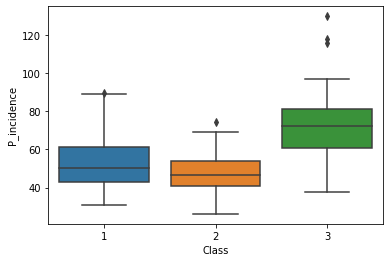

In [ ]:
sns.boxplot(x='Class',y = 'P_incidence', data = df)
plt.show()

from above Boxplot, we can say that there are some outliers present for Type_H and Type_S category for P_incidence column

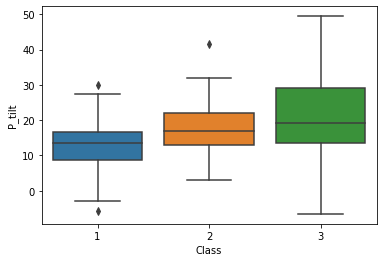

In [ ]:
plot = sns.boxplot(x='Class',y = 'P_tilt', data = df)
plt.show()

There are not significant outliers in the P_tilt column of data

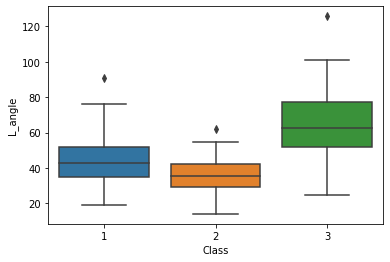

In [ ]:
plot = sns.boxplot(x='Class',y = 'L_angle', data = df)
plt.show()

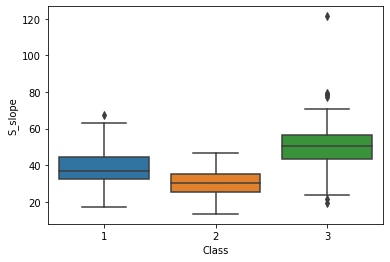

In [ ]:
plot = sns.boxplot(x='Class',y = 'S_slope', data = df)
plt.show()

No significant outliers in this also

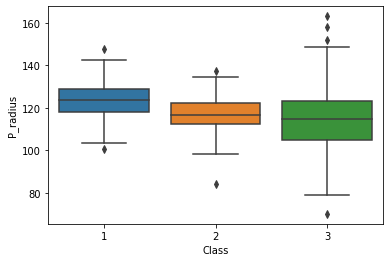

In [ ]:
plot = sns.boxplot(x='Class',y = 'P_radius', data = df)
plt.show()

There are outliers present in P_radius attribute, but not of considerable amount. So, ignoring these.

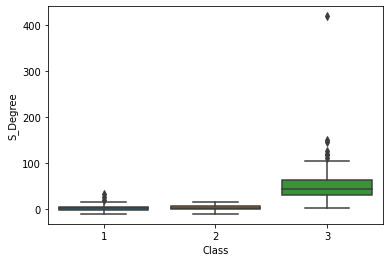

In [ ]:
plot = sns.boxplot(x='Class',y = 'S_Degree', data = df)
plt.show()

There are outliers in class three for S_Degree attribute. Need to remove these outliers.

Text(0, 0.5, 'S_Degree')

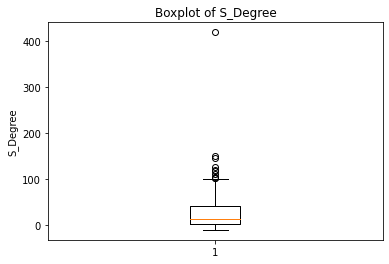

In [ ]:
plot = plt.boxplot(df.S_Degree)
plt.title('Boxplot of S_Degree')
plt.ylabel("S_Degree")

Get the upper fence from the box plot

In [ ]:
upper_fence = plot['caps'][1].get_data()[1][1] 
upper_fence

100.2921068

Check number of outliers greater than upper fence.

In [ ]:
print(f'Number of outliers = {len(df[df.S_Degree > upper_fence])}')

df[df.S_Degree > upper_fence]

Number of outliers = 10


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
11,86.900794,32.928168,47.794347,53.972627,135.075364,101.719092,3
15,70.221452,39.822724,68.118403,30.398728,148.525562,145.378143,3
16,86.753609,36.043016,69.221045,50.710593,139.414504,110.860782,3
35,57.522356,33.647075,50.909858,23.875281,140.981712,148.753711,3
55,129.834041,8.404475,48.384057,121.429566,107.690466,418.543082,3
81,89.504947,48.903653,72.003423,40.601295,134.634291,118.353370,3
83,60.626217,20.595958,64.535262,40.030259,117.225554,104.859247,3
132,74.469082,33.283157,66.942101,41.185925,146.466001,124.984406,3
137,58.828379,37.577873,125.742385,21.250506,135.629418,117.314683,3
142,76.314028,41.933683,93.284863,34.380345,132.267285,101.218783,3


Dropping the values that are greater than upper fence.


In [ ]:
df.drop(df[df.S_Degree > upper_fence].index, inplace = True)

In [ ]:
df.shape

(288, 7)

Multivariate Analysis

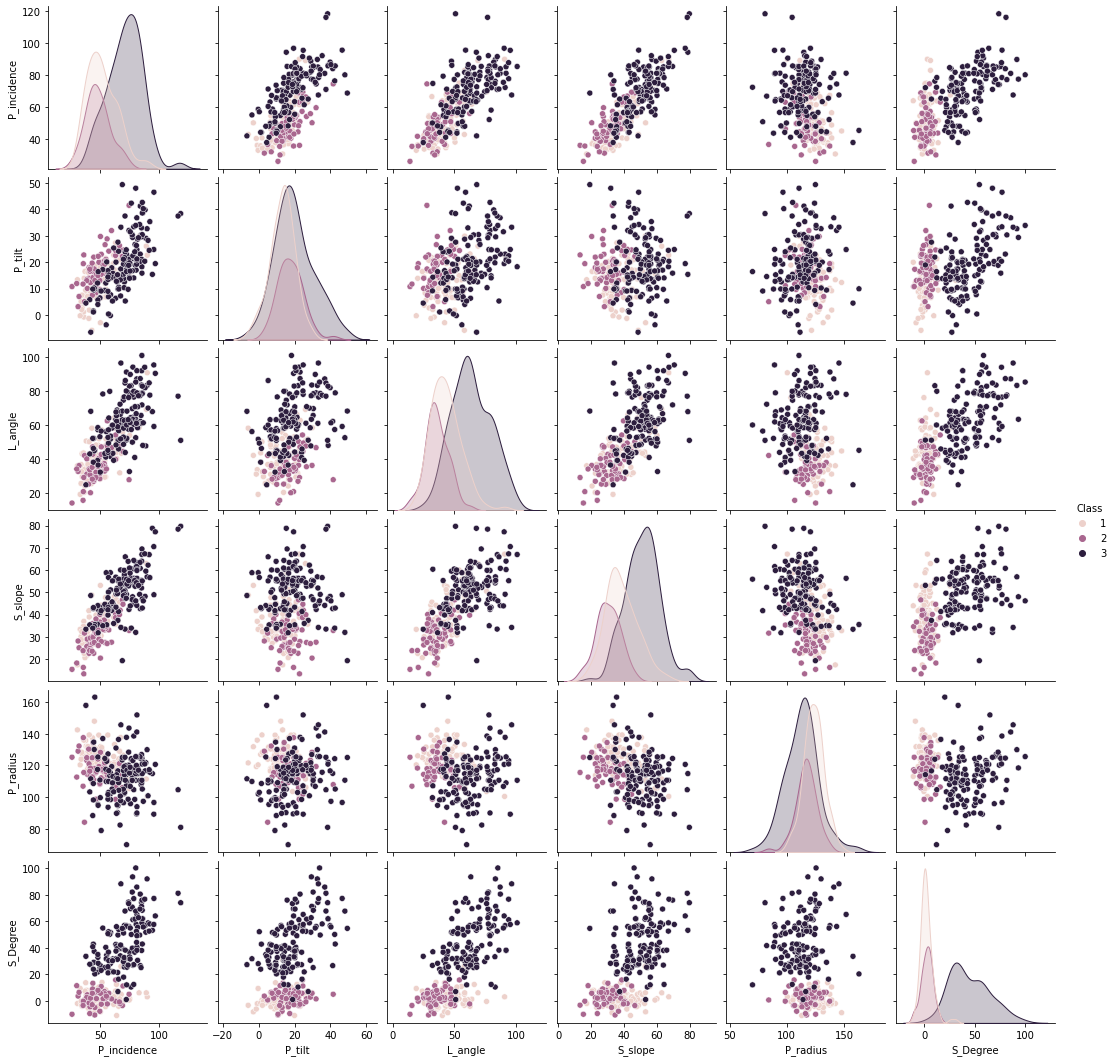

In [ ]:
sns.pairplot(df, hue = 'Class',diag_kind='kde')

* can see linear relationship between P_incidence, P_tilt, L_angle, S_slope, P_radius.
* Skewness in the data





**4. Data pre-processing:**
* Segregate predictors vs target attributes


In [ ]:
X = df.drop('Class', axis=1)
Y = df['Class']

In [ ]:
X.shape

(288, 6)

In [ ]:
Y.shape

(288,)

In [ ]:
X.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910


Scaling

In [ ]:
Xscaled = X.apply(zscore)

In [ ]:
Xscaled.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02
mean,-3.881926e-16,-4.187430e-17,-1.715449e-16,-2.891206e-17,1.688464e-16,-1.051435e-16
std,1.001741e+00,1.001741e+00,1.001741e+00,1.001741e+00,1.001741e+00,1.001741e+00
min,-2.031011e+00,-2.474291e+00,-2.075228e+00,-2.336249e+00,-3.618477e+00,-1.314437e+00
25%,-8.306384e-01,-6.763841e-01,-8.111224e-01,-7.641000e-01,-4.995075e-01,-8.265172e-01
50%,-1.041214e-01,-9.124661e-02,-1.530952e-01,-4.063230e-02,4.431488e-02,-4.316360e-01
75%,7.377445e-01,4.771363e-01,6.127858e-01,7.750384e-01,6.042765e-01,6.436214e-01
max,3.438073e+00,3.348655e+00,2.709239e+00,2.879463e+00,3.529660e+00,2.992042e+00


In [ ]:
df.groupby(['Class']).count()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
Class,,,,,,
1,93,93,93,93,93,93
2,55,55,55,55,55,55
3,140,140,140,140,140,140


Perform train-test split.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(Xscaled, Y, test_size=0.30, random_state=1)

In [ ]:
X_train.shape

(201, 6)

In [ ]:
Y_train.shape

(201,)

Check for target balancing. Add your comments.

In [ ]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
smote = SMOTE(random_state = 14)
X_train, Y_train = smote.fit_sample(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train.shape

(201, 6)

In [ ]:
Y_train.shape

(201,)

We have balanced the dataset by SMOTE technique. It comes under oversampling.

**5. Model training, testing and tuning:**
* Design and train a KNN classifier.
* Display the classification accuracies for train and test data.
* Display and explain the classification report in detail.
* Automate the task of finding best values of K for KNN.
* Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained model with your comments for selecting this model.

In [ ]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [ ]:
NNH.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [ ]:
Y_pred = NNH.predict(X_test)
NNH.score(X_test, Y_test)

0.735632183908046

Confusion Matrix


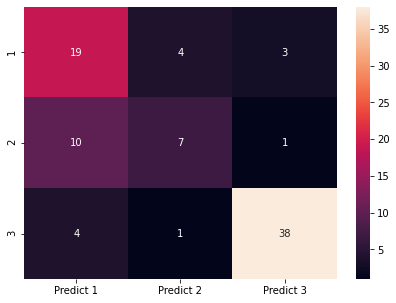

In [ ]:
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(Y_test, Y_pred, labels=[1,2,3])

df_cm = pd.DataFrame(cm, index = [i for i in [1,2,3]],
                  columns = [i for i in ["Predict 1","Predict 2","Predict 3"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

Display and explain the classification report in detail.

In [ ]:
print(classification_report(Y_test,Y_pred))


              precision    recall  f1-score   support

           1       0.58      0.73      0.64        26
           2       0.58      0.39      0.47        18
           3       0.90      0.88      0.89        43

    accuracy                           0.74        87
   macro avg       0.69      0.67      0.67        87
weighted avg       0.74      0.74      0.73        87



I would choose a f1 score as it is more accurate. Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial. Accuracy can be used when the class distribution is similar while F1-score is a better metric when there are imbalanced classes as in the above case

In [ ]:
scores = []
for k in range (1,50):
  NNH = KNeighborsClassifier(n_neighbors=k, weights = 'distance')
  NNH.fit(X_train,Y_train)
  scores.append(NNH.score(X_test,Y_test))


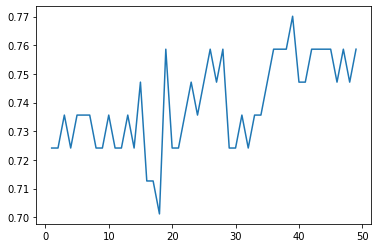

In [ ]:
plt.plot(range(1,50),scores)

Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained
model with your comments for selecting this model.

In [ ]:
parameters = {'n_neighbors':range(1,50)}
gridsearch = GridSearchCV(KNeighborsRegressor(),parameters)
gridsearch.fit(X_train,Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 50)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [ ]:
gridsearch.best_params_

{'n_neighbors': 9}

Below I am taking n_neighbors value =9 and calculating the accuracy of the same

In [ ]:
NNH1 = KNeighborsClassifier(n_neighbors= 9 , weights = 'distance' )
NNH1.fit(X_train,Y_train)
Y_pred1 = NNH.predict(X_test)
NNH1.score(X_test, Y_test)

0.7241379310344828

In [ ]:
NNH1 = KNeighborsClassifier(n_neighbors= 7 , weights = 'distance' )
NNH1.fit(X_train,Y_train)
Y_pred1 = NNH.predict(X_test)
NNH1.score(X_test, Y_test)

0.735632183908046

**6. Conclusion and improvisation:**
* Write your conclusion on the results.


From the above We can see that when we take N_neighbors value 3,5,7, giving out the same accuracy of 0.7356321 while we take the value =9 , it's value is decreasing that is 0.7241379310344828. Therefore Model with N_neighbors value = 3,5,7 anything from these values is a good model.

* Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points
collected by the research team to perform a better data analysis in future.

* **Quality**: Data is good as it not having any missing value.
* **Quantity**: I suggest, there should be more data so that the analysis performed should be more accurate as we would have used suffice data to train our model
* **Variety**: Variety is ok as data is consistent. It contains all the values in numeric form and it's for a classification problem. It contains 3 categories for which we have to classify. For that data should be in such a variety that proportion of these 3 classes is somewhat similar.
* **Veracity** feature measures the accuracy of data and its potential use for analysis. Here data is accurate and good for analysis.
* **Visualising**: Visualising data is about representing key information and knowledge more instinctively and effectively through using different visual formats such as in a pictorial or graphical layout This data has a good visualising power.
    1 More data [rows] is required for better learning.
    2 Each class to have equal representation.
    3 A regressed value could be provided which can give away the classes. Keeping an oprtion of regressor open